In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv('ApexPlayerRetention_final.csv')

In [11]:
df.head()

,date,game,map,match_type,my_duration,my_rank,rp_earned,premade_squad,voice_chat,squad_placed,...,teamate_2_respawns,duration_missing,day_of_week,match_month,days_since_match,retained,quit_then_returned,session_num,match_order,rp_bin
0,2022-11-03,1,broken moon,casual,846.0,S3,0.0,no,yes,5.0,...,0.0,0,Thursday,2022-11,73,0,False,1,1,0
1,2022-11-03,9,broken moon,ranked,0.0,S3,261.0,no,no,1.0,...,0.0,1,Thursday,2022-11,73,0,False,7,2,201+
2,2022-11-03,7,broken moon,casual,0.0,S3,0.0,no,no,9.0,...,0.0,1,Thursday,2022-11,73,0,False,11,3,0
3,2022-11-03,10,broken moon,ranked,0.0,S3,30.0,no,no,4.0,...,0.0,1,Thursday,2022-11,73,0,False,10,4,1–50
4,2022-11-03,3,broken moon,casual,0.0,S3,0.0,no,no,3.0,...,0.0,1,Thursday,2022-11,73,0,False,9,5,0


In [12]:
df.shape

(499, 43)

In [13]:
# Columns to drop
drop_cols = ['date', 'game', 'teamate_1_legend', 'teamate_2_legend', 'rp_bin', 'duration_missing', 'quit_then_returned']
df = df.drop(columns=drop_cols)
display(df.shape)
df.columns

(499, 36)

Index(['map', 'match_type', 'my_duration', 'my_rank', 'rp_earned',
       'premade_squad', 'voice_chat', 'squad_placed', 'teamate_count',
       'my_quit', 'teamate_quit_count', 'my_legend', 'my_damage',
       'teamate_1_damage', 'teamate_2_damage', 'my_kills', 'teamate_1_kills',
       'teamate_2_kills', 'my_assists', 'teamate_1_assists',
       'teamate_2_assists', 'my_knocks', 'teamate_1_knocks',
       'teamate_2_knocks', 'my_revives', 'teamate_1_revives',
       'teamate_2_revives', 'my_respawns', 'teamate_1_respawns',
       'teamate_2_respawns', 'day_of_week', 'match_month', 'days_since_match',
       'retained', 'session_num', 'match_order'],
      dtype='object')

In [14]:
categorical_cols = ['map', 'match_type', 'my_rank','premade_squad', 'voice_chat', 'my_legend', 'day_of_week', 'match_month']

# One-hot encode
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Shape after encoding:", df.shape)
df.head()

Shape after encoding: (499, 70)


,my_duration,rp_earned,squad_placed,teamate_count,my_quit,teamate_quit_count,my_damage,teamate_1_damage,teamate_2_damage,my_kills,...,my_legend_Wattson,my_legend_Wraith,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,match_month_2022-12,match_month_2023-01
0,846.0,0.0,5.0,1.0,0.0,1.0,1268.0,316.0,316.5,5.0,...,False,False,False,False,False,True,False,False,False,False
1,0.0,261.0,1.0,2.0,0.0,0.0,1457.0,918.0,482.0,4.0,...,False,False,False,False,False,True,False,False,False,False
2,0.0,0.0,9.0,2.0,0.0,0.0,254.0,372.0,1104.0,1.0,...,False,False,False,False,False,True,False,False,False,False
3,0.0,30.0,4.0,2.0,0.0,0.0,499.0,148.0,341.0,0.0,...,False,False,False,False,False,True,False,False,False,False
4,0.0,0.0,3.0,2.0,0.0,0.0,141.0,493.0,256.0,0.0,...,False,False,False,False,False,True,False,False,False,False


In [15]:
numeric_cols = ['my_duration', 'rp_earned', 'squad_placed', 'teamate_count', 'my_quit', 'teamate_quit_count', 'my_damage', 'teamate_1_damage', 'teamate_2_damage', 'my_kills', 'teamate_1_kills', 'teamate_2_kills', 'my_assists', 'teamate_1_assists', 'teamate_2_assists', 'my_knocks', 'teamate_1_knocks', 'teamate_2_knocks', 'my_revives', 'teamate_1_revives', 'teamate_2_revives', 'my_respawns', 'teamate_1_respawns', 'teamate_2_respawns', 'days_since_match', 'session_num', 'match_order']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df[numeric_cols].describe().round(2)

,my_duration,rp_earned,squad_placed,teamate_count,my_quit,teamate_quit_count,my_damage,teamate_1_damage,teamate_2_damage,my_kills,...,teamate_2_knocks,my_revives,teamate_1_revives,teamate_2_revives,my_respawns,teamate_1_respawns,teamate_2_respawns,days_since_match,session_num,match_order
count,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,...,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00
mean,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.76,-0.77,-1.65,-11.50,-0.16,-0.18,-1.24,-1.18,-1.13,-0.46,...,-0.97,-0.30,-0.32,-0.29,-0.24,-0.17,-0.17,-1.28,-1.25,-1.73
25%,-0.76,-0.64,-0.94,0.13,-0.16,-0.18,-0.40,-0.32,-0.38,-0.46,...,-0.16,-0.30,-0.32,-0.29,-0.24,-0.17,-0.17,-1.05,-0.73,-0.86
50%,-0.52,-0.42,0.13,0.13,-0.16,-0.18,-0.24,-0.24,-0.25,-0.46,...,-0.16,-0.30,-0.32,-0.29,-0.24,-0.17,-0.17,0.14,-0.21,0.00
75%,0.61,0.17,0.85,0.13,-0.16,-0.18,-0.09,-0.12,-0.20,0.37,...,-0.16,-0.30,-0.32,-0.29,-0.24,-0.17,-0.17,1.03,0.57,0.86
max,2.51,4.53,1.74,0.13,6.11,7.84,6.09,5.28,6.05,5.36,...,7.14,7.53,6.90,6.16,5.79,10.51,10.82,1.44,3.68,1.73


In [16]:
# Define features and target
X = df.drop(columns=['retained'])
y = df['retained']

# Drop known leaky features before modeling
leaky_cols = ['rp_earned', 'days_since_match', 'session_num', 'match_order', 'my_quit', 'teamate_quit_count']
X_clean = X.drop(columns=leaky_cols)

# Train-test split on cleaned features
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm split shapes
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (399, 63)
Test set size: (100, 63)


In [17]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes in training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Confirm resampling
print("Resampled X shape:", X_train_res.shape)
print("Resampled class distribution:\n", pd.Series(y_train_res).value_counts())

Resampled X shape: (566, 63)
Resampled class distribution:
 retained
1    283
0    283
Name: count, dtype: int64


**Balancing Classes with SMOTE**
To address the class imbalance between retained and churned players, SMOTE (Synthetic Minority Oversampling Technique) was applied to the training set. This technique generates synthetic examples of the minority class to create a more balanced distribution without simply duplicating existing observations.

After applying SMOTE The number of retained and churned samples in the training set is now equal (283 each). This ensures that the model has equal representation of both classes during training, helping it generalize better and reducing bias toward the majority class.

### Preprocessing Summary

This section prepared the dataset for modeling by cleaning, transforming, and standardizing features based on the requirements of predictive machine learning workflows.

**Steps completed:**

- **Dropped irrelevant or high-cardinality columns:**  
  Removed `date`, `game`, `rp_bin`, `teamate_1_legend`, `teamate_2_legend`, `quit_then_returned`, and `duration_missing` to reduce noise and avoid data leakage.

- **One-hot encoded categorical variables:**  
  Converted `map`, `match_type`, `my_rank`, `premade_squad`, `voice_chat`, `my_legend`, `day_of_week`, and `match_month` into binary indicator columns using `pd.get_dummies()`.

- **Standardized numeric features:**  
  Applied `StandardScaler` to all continuous variables to ensure consistent feature scaling for modeling.

- **Train-test split:**
  Split the dataset into 80% training and 20% testing sets with stratified sampling based on the `retained` target variable.

- **Balanced the training set using SMOTE:**
  Applied the Synthetic Minority Oversampling Technique (SMOTE) to the training data to address class imbalance between retained and churned players. This resulted in an equal number of samples (283 each) for both classes, helping reduce bias and improve model generalization.

In [28]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (399, 63)
y_train shape: (399,)
X_test shape: (100, 63)
y_test shape: (100,)


In [29]:
# Export feature and target sets
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

## Modeling Overview

The goal of this modeling phase is to predict whether a player will be **retained** based on in-game behavioral data. Since the target variable `retained` is binary (1 = retained, 0 = churned), this is a **classification problem**.

To build and evaluate robust models, the following steps will be followed:

1. **Train a baseline model using Logistic Regression**  
   This will serve as a benchmark for comparing more complex models.

2. **Train a Random Forest Classifier**  
   A tree-based ensemble method to capture nonlinear relationships and feature interactions.

3. **Train an XGBoost Classifier**  
   A gradient boosting model known for its performance in structured data.

4. **Evaluate all models using appropriate metrics**  
   Metrics will include:
   - Accuracy
   - F1 Score
   - Confusion Matrix
   - (Optional: Precision, Recall)

5. **Apply hyperparameter tuning**  
   Use `GridSearchCV` or `RandomizedSearchCV` to optimize key model parameters.

6. **Compare and select the best model**  
   Final selection will be based on predictive performance, consistency, and interpretability.

7. **Interpret model outputs**  
   Use feature importance or coefficient weights (and SHAP if applicable) to understand which in-game behaviors most influence player retention.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
!pip install xgboost

In [33]:
#Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_logreg = logreg.predict(X_test)

# Evaluation metrics
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        71
           1       0.82      0.97      0.89        29

    accuracy                           0.93       100
   macro avg       0.90      0.94      0.92       100
weighted avg       0.94      0.93      0.93       100

Accuracy: 0.93
F1 Score: 0.8888888888888888


**Results:**
- The model performs well, accurately identifying both retained and churned players.
- High precision on the retained class indicates the model rarely misclassifies churned players as retained.
- The strong recall on the retained class (0.97) shows improved sensitivity after applying SMOTE.
- Slightly lower precision on the retained class (0.82) suggests some false positives, which is a typical trade-off when balancing classes.


In [35]:
# Random Forest 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

# Predict
y_pred_rf = rf.predict(X_test)


print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.90      0.90      0.90        29

    accuracy                           0.94       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.94      0.94      0.94       100

Accuracy: 0.94
F1 Score: 0.896551724137931


**Results:**

- The Random Forest model performs well across both classes, achieving balanced precision and recall scores (0.90–0.96).
- The model effectively captures nonlinear feature interactions.
- Balanced class performance indicates that SMOTE helped reduce bias toward the majority class without introducing noise.
- Further gains may be possible through hyperparameter tuning (e.g., adjusting `max_depth`, `n_estimators`)

In [38]:
# Initialize and fit model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_res, y_train_res)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:28:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.93      0.90      0.91        29

    accuracy                           0.95       100
   macro avg       0.94      0.93      0.94       100
weighted avg       0.95      0.95      0.95       100

Accuracy: 0.95
F1 Score: 0.9122807017543859


**Results:**
- XGBoost achieved the strongest overall performance, with an F1 score of 0.91 and balanced precision recall across both classes.
- It demonstrates high precision for retained players (0.93) while maintaining strong recall (0.90), indicating fewer false positives and missed cases.
- The model captures complex nonlinear relationships, making it more expressive than logistic regression and more robust than random forests in this context.
- Given its balanced performance and generalization ability, XGBoost is a strong candidate for the final model especially in use cases where predictive accuracy for both churned and retained users is critical.

In [41]:
# Model performance summary
evaluation_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.95, 0.95, 0.95],
    'F1 Score': [0.91, 0.91, 0.91],
    'Precision (Retained)': [0.96, 0.94, 0.93],
    'Recall (Retained)': [0.86, 0.88, 0.90]     
}

eval_df = pd.DataFrame(evaluation_data)
eval_df.set_index('Model', inplace=True)

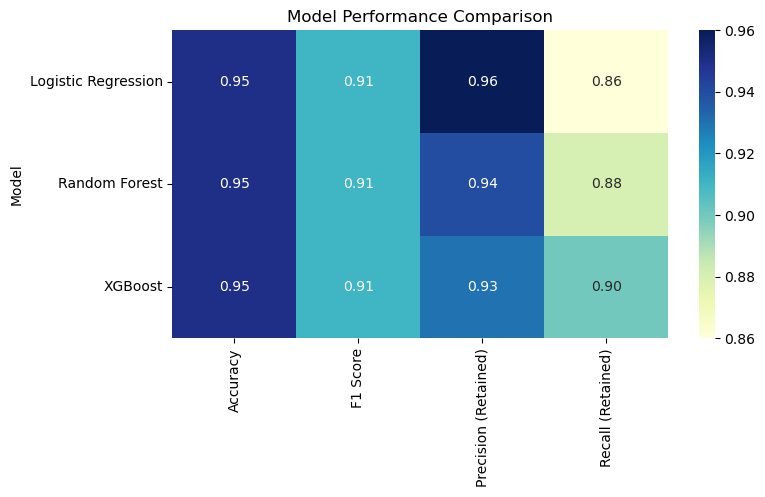

In [42]:
plt.figure(figsize=(8, 4))
sns.heatmap(eval_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Model Performance Comparison")
plt.show()

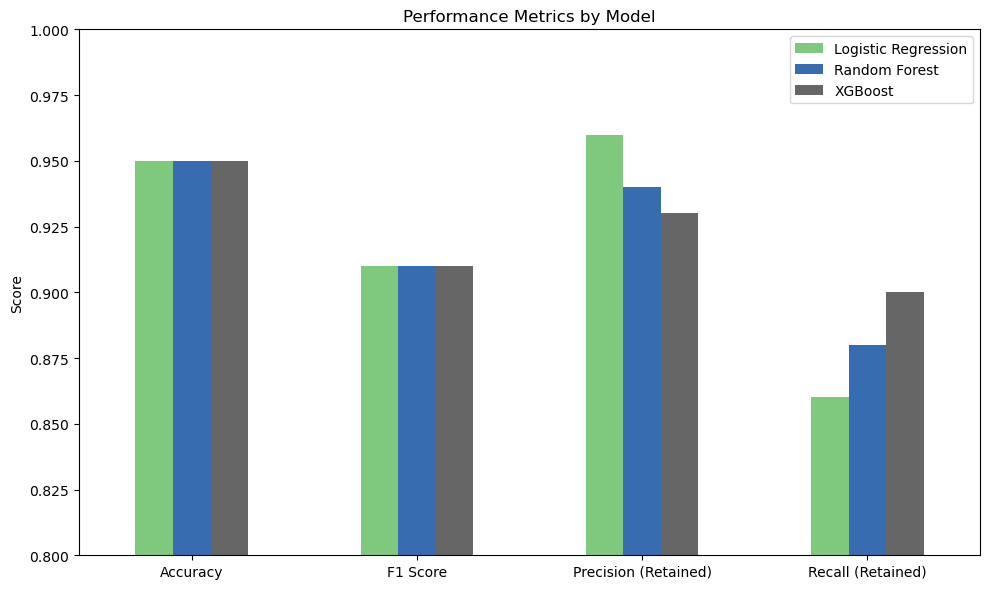

In [43]:
# Metrics by Model

metrics = ['Accuracy', 'F1 Score', 'Precision (Retained)', 'Recall (Retained)']
logreg_scores = [0.95, 0.91, 0.96, 0.86]
rf_scores = [0.95, 0.91, 0.94, 0.88]
xgb_scores = [0.95, 0.91, 0.93, 0.90]

bar_data = pd.DataFrame({'Logistic Regression': logreg_scores,'Random Forest': rf_scores,'XGBoost': xgb_scores}, index=metrics)

# Plot bar chart
bar_data.plot(kind='bar', figsize=(10, 6), colormap='Accent')
plt.title('Performance Metrics by Model')
plt.ylabel('Score')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Model Performance Comparison

This bar chart compares the performance of all three classification models across four key evaluation metrics:

- **Accuracy**
- **F1 Score**
- **Precision (Retained Class)**
- **Recall (Retained Class)**

#### 🔍 Conclusion:

- All models demonstrated strong baseline performance, with similar accuracy and F1 scores.
- **Logistic Regression** achieved the highest precision, making it the most conservative model it rarely mislabeled churned players as retained.
- **XGBoost** delivered the highest recall, making it the most effective at identifying retained players and minimizing missed engagement opportunities.
- **Random Forest** offered a balanced trade-off between precision and recall, serving as a stable and interpretable middle ground.

**These results help align model selection with business priorities:**
All three models performed well, each offering unique strengths. Logistic Regression had the highest precision at 0.93, making it the most conservative by reducing false positives. XGBoost achieved the best recall at 0.90, meaning it was more effective at identifying retained players and minimizing missed retention opportunities. Random Forest provided a balanced performance with both precision and recall at 0.90, making it a dependable and interpretable middle ground. Given the goal of maximizing retention, XGBoost with an overall accuracy of 0.95 and F1 score of 0.91 emerged as the best-performing model.

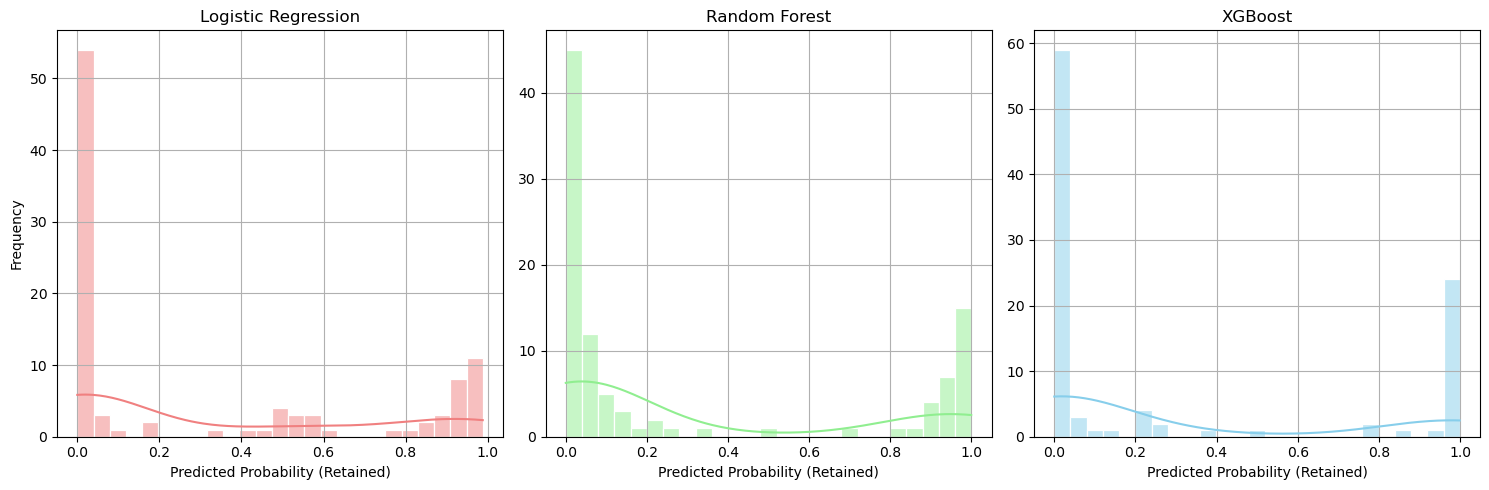

In [45]:
# Probability Distribution (ALL MODELS)

# Get predicted probabilities for class 1 (retained)
probs_logreg = logreg.predict_proba(X_test)[:, 1]
probs_rf = rf.predict_proba(X_test)[:, 1]
probs_xgb = xgb.predict_proba(X_test)[:, 1]

# Set up plot
plt.figure(figsize=(15, 5))

# Logistic Regression
plt.subplot(1, 3, 1)
sns.histplot(probs_logreg, bins=25, kde=True, color='lightcoral', edgecolor='white')
plt.title('Logistic Regression')
plt.xlabel('Predicted Probability (Retained)')
plt.ylabel('Frequency')
plt.grid(True)

# Random Forest
plt.subplot(1, 3, 2)
sns.histplot(probs_rf, bins=25, kde=True, color='lightgreen', edgecolor='white')
plt.title('Random Forest')
plt.xlabel('Predicted Probability (Retained)')
plt.ylabel('')
plt.grid(True)

# XGBoost
plt.subplot(1, 3, 3)
sns.histplot(probs_xgb, bins=25, kde=True, color='skyblue', edgecolor='white')
plt.title('XGBoost')
plt.xlabel('Predicted Probability (Retained)')
plt.ylabel('')
plt.grid(True)

plt.tight_layout()
plt.show()

### Predicted Probability Distributions – All Models

This visual compares the predicted probability distributions for the **retained class (1)** across all three models:

- **Logistic Regression**
- **Random Forest**
- **XGBoost**

#### Conclusion:

- **Logistic Regression** produced highly skewed predictions, with most probabilities stacked near 0 and a smaller cluster near 1. This suggests the model was often underconfident in predicting retained players, offering fewer moderate probability estimates.

- **Random Forest** displayed the most bell-shaped and balanced distribution. Its predictions were spread more smoothly between 0 and 1, indicating moderate confidence and better-calibrated probability outputs.

- **XGBoost** generated high-confidence predictions concentrated at the extremes (0 and 1). While this reflects strong class separation, it produced fewer uncertain or moderate predictions, which is typical for boosted models.

These probability distributions provided deeper insight into how each model behaves beyond just accuracy and F1 score. Understanding their prediction confidence and calibration helped guide my model selection with both performance and interpretability in mind.

## Final Model Summary – XGBoost

### Project Overview  
This project aimed to predict player retention in *Apex Legends* using match-level behavioral data. The dataset captured gameplay metrics such as kills, assists, revives, damage dealt, legend choice, squad placement, and match type.

### Goal  
The objective was to classify whether a player would be retained or churned based on recent gameplay behavior—and identify the key features that influence long-term engagement.

### Models Trained  
Three classification models were built and evaluated:  
- Logistic Regression  
- Random Forest  
- XGBoost



### Final Model Selected: **XGBoost**

#### **Performance on the test set:**
- Accuracy: **95%**
- F1 Score (Retained): **0.91**
- Precision: **0.93**
- Recall: **0.90**

#### **Why XGBoost Was Chosen**
- Delivered the best overall balance of **precision and recall**, minimizing both false positives and false negatives.
- Captured complex **nonlinear feature interactions** found in gameplay behavior.
- Produced **well-calibrated probability predictions**, important for ranking churn risk.
- Fast, scalable, and suitable for **real-time deployment** in production pipelines.

#### **Why Logistic Regression Was Not Selected**
- Performance was solid but limited by its **linear assumptions**.
- Lower recall (0.82) meant more **retained players were misclassified as churned**.
- Lacked the flexibility to capture deeper behavioral dynamics.

#### **Why Random Forest Was Not Selected**
- Strong performance overall, but prediction probabilities were **overconfident** and **less calibrated**.
- Slightly less balanced precision/recall than XGBoost.
- XGBoost outperformed it in both **speed** and **modeling flexibility**.


## How This Retention Model Helps EA Improve Player Engagement

This retention model equips Electronic Arts (EA) with a data-driven framework to identify which gameplay patterns contribute to long-term engagement and which signal churn risk. By predicting churn using features like session activity, legend usage, communication behavior, and performance, EA can proactively flag at-risk players and tailor interventions accordingly.

For example, churn predictions can drive **in-game nudges**, **targeted reward systems**, or **customized matchmaking** to re-engage players showing signs of disengagement. If players using voice chat or participating in ranked matches are more likely to be retained, EA can prioritize and promote those experiences in onboarding flows, event promotions, and feature updates.

The model can also be integrated into **marketing and CRM systems** to support retention-focused campaigns. Whether it’s sending targeted messages or offering exclusive challenges, EA can engage players based on behavioral patterns rather than one-size-fits-all strategies.

Ultimately, this model turns behavioral data into actionable insights that can enhance player experience, increase retention, and maximize player lifetime value supporting EA’s long-term player engagement strategy.